# Wind Generation
- Data comes from https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/geracao-media-diaria-horaria.aspx

In [4]:
import pandas as pd
from get_files_only import get_file_from_xdrive
from get_prepared_data import get_wind_generation_data_cleaned

pivot_df = get_wind_generation_data_cleaned()
pivot_df.head()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=37897397308-8h2dck33fj91dilfohpi99n9pbuaejt0.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A52817%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=IpwQA6apaFKY1E7AAaSuoGSmo0ze5P&access_type=offline


Region,Wind_Generation_N(MWavg),Wind_Generation_NE(MWavg),Wind_Generation_S(MWavg),DateTime,Wind_Generation_SUM(MWavg)
0,4635.528,152278.987,12528.599,2021-01-01,169443.114
1,7423.441,143072.144,10097.778,2021-01-02,160593.363
2,8220.153,150218.195,24163.685,2021-01-03,182602.033
3,6926.451,144503.315,35551.264,2021-01-04,186981.030
4,7292.366,178861.136,22825.809,2021-01-05,208979.311


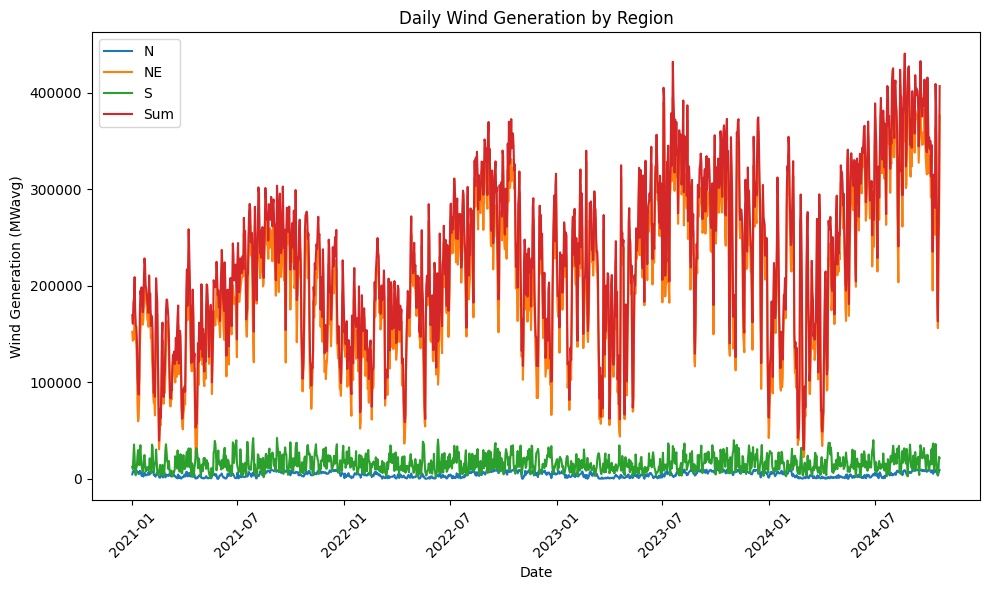

In [5]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each region's data
plt.plot(pivot_df['DateTime'], pivot_df['Wind_Generation_N(MWavg)'], label="N" )
plt.plot(pivot_df['DateTime'], pivot_df['Wind_Generation_NE(MWavg)'], label="NE")
plt.plot(pivot_df['DateTime'], pivot_df['Wind_Generation_S(MWavg)'], label="S")
plt.plot(pivot_df['DateTime'], pivot_df['Wind_Generation_SUM(MWavg)'], label="Sum")

# Customize the plot
plt.title('Daily Wind Generation by Region')
plt.xlabel('Date')
plt.ylabel('Wind Generation (MWavg)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

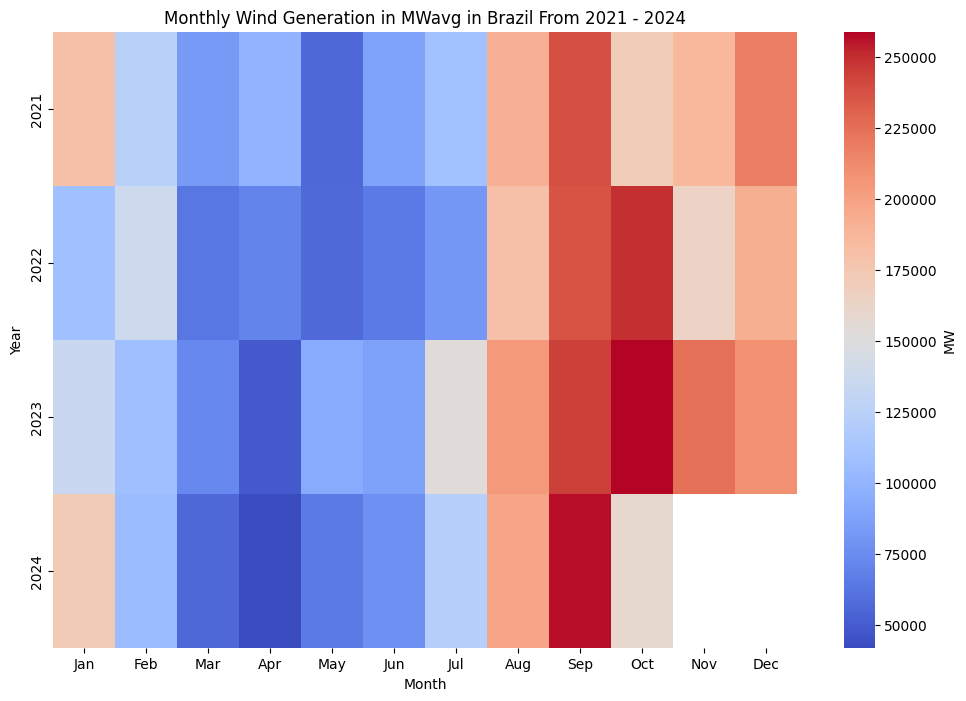

In [6]:
import seaborn as sns
# Extract year and month from the 'Date' column
pivot_df['Year'] = pivot_df['DateTime'].dt.year
pivot_df['Month'] = pivot_df['DateTime'].dt.month

# Aggregate data by Year and Month for each region
df_monthly = pivot_df.groupby(['Year', 'Month'])[['Wind_Generation_N(MWavg)', 
                                              'Wind_Generation_NE(MWavg)', 
                                              'Wind_Generation_S(MWavg)']].sum().reset_index()

# Pivot the DataFrame to create a matrix for the heatmap
df_pivot = df_monthly.pivot_table(index='Year', 
                                  columns='Month', 
                                  values=['Wind_Generation_N(MWavg)', 
                                          'Wind_Generation_NE(MWavg)', 
                                          'Wind_Generation_S(MWavg)'], 
                                  aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))

# Using seaborn to plot heatmap for each region
sns.heatmap(df_pivot['Wind_Generation_N(MWavg)'], cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'MW'}, 
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Monthly Wind Generation in MWavg in Brazil From 2021 - 2024')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

In [14]:
num_rows_with_na = df_pivot.isna().any(axis=1).sum()
print(num_rows_with_na)

1
